In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#dataset merupakan data kendaraan yang diberikan oleh dosen pengampu mata kuliah MCL

df = pd.read_csv('kendaraan_train.csv')
df

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [2]:
#cek baris dan kolom dari dataset

print('Number of Rows :',len(df.axes[0]))
print('NUmber of Columns :',len(df.axes[1]))

Number of Rows : 285831
NUmber of Columns : 12


In [3]:
#mapping jenis_kelamin, umur_kendaraan,'Kendaraan_rusak'

df['Jenis_Kelamin'] = df['Jenis_Kelamin'].map({"Pria":0,
                                                 "Wanita":1})

df['Umur_Kendaraan'] = df['Umur_Kendaraan'].map({"< 1 Tahun":0,
                                                 "1-2 Tahun":1,
                                                 "> 2 Tahun":2})

df['Kendaraan_Rusak'] = df['Kendaraan_Rusak'].map({"Tidak":0,
                                                 "Pernah":1})

In [4]:
df[['Jenis_Kelamin','Umur_Kendaraan','Kendaraan_Rusak']]

,Jenis_Kelamin,Umur_Kendaraan,Kendaraan_Rusak
0,1.0,0.0,0.0
1,0.0,2.0,1.0
2,NaN,0.0,0.0
3,1.0,1.0,0.0
4,0.0,2.0,NaN
...,...,...,...
285826,1.0,0.0,0.0
285827,1.0,0.0,0.0
285828,1.0,0.0,0.0
285829,0.0,1.0,0.0


In [5]:
#cek tipe data dari tiap kolom

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
id                   285831 non-null int64
Jenis_Kelamin        271391 non-null float64
Umur                 271617 non-null float64
SIM                  271427 non-null float64
Kode_Daerah          271525 non-null float64
Sudah_Asuransi       271602 non-null float64
Umur_Kendaraan       271556 non-null float64
Kendaraan_Rusak      271643 non-null float64
Premi                271262 non-null float64
Kanal_Penjualan      271532 non-null float64
Lama_Berlangganan    271839 non-null float64
Tertarik             285831 non-null int64
dtypes: float64(10), int64(2)
memory usage: 26.2 MB


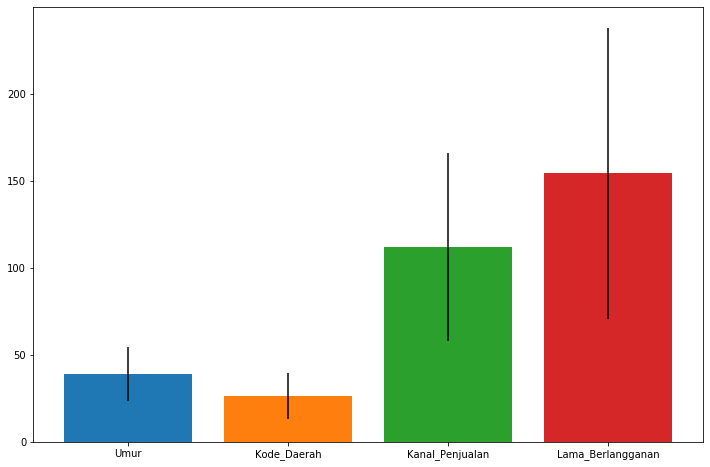

In [6]:
#Analisa distribusi data kolom Umur, Kode_Daerah, Kanal_Penjualan, dan Lama_Berlangganan.

df_mean = df[['Umur','Kode_Daerah','Kanal_Penjualan','Lama_Berlangganan']].mean()

fig9, ax9 = plt.subplots(figsize=(12,8))
for i in range(len(df_mean)):
    ax9.bar(df_mean.index[i], df_mean.values[i], yerr=df[['Umur','Kode_Daerah','Kanal_Penjualan','Lama_Berlangganan']].std()[i])

plt.show()

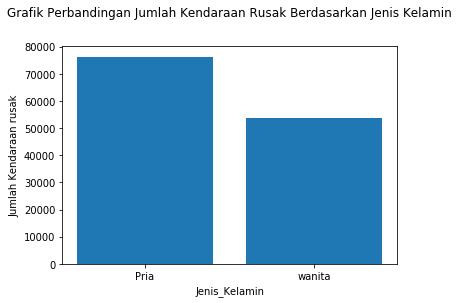

In [7]:
#Analisa perbandingan jumlah kendaraan rusak berdasarkan jenis kelamin.

x = df.groupby('Jenis_Kelamin').sum()[['Kendaraan_Rusak']].reset_index()
plt.bar(x['Jenis_Kelamin'],height=x['Kendaraan_Rusak'],tick_label = ['Pria','wanita'])
plt.xlabel('Jenis_Kelamin')
plt.ylabel('Jumlah Kendaraan rusak')
plt.title('Grafik Perbandingan Jumlah Kendaraan Rusak Berdasarkan Jenis Kelamin',pad=30)
plt.show()

In [8]:
#deskripsi statistik dari dataset

df.describe()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271391.000000,271617.000000,271427.000000,271525.000000,271602.000000,271556.000000,271643.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,0.459533,38.844336,0.997848,26.405410,0.458778,0.609801,0.504791,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,0.498361,15.522487,0.046335,13.252714,0.498299,0.567478,0.499978,17155.000770,54.202457,83.694910,0.327830
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,0.000000,36.000000,1.000000,28.000000,0.000000,1.000000,1.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


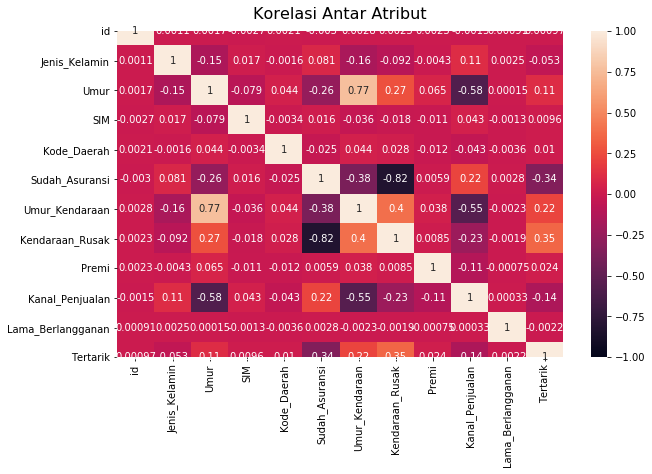

In [9]:
#analisa nilai korelasi setiap atribut dari dataset

import seaborn as sns

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(df.corr(), vmin=-1 , vmax=1, annot=True)
ax.set_title('Korelasi Antar Atribut',fontdict={'fontsize':16},pad=12)
plt.show()

In [10]:
#cek missing value dari atribut Umur dan Umur_Kendaraan

df[['Umur','Umur_Kendaraan']].isna().sum()

Umur              14214
Umur_Kendaraan    14275
dtype: int64

In [11]:
#cek nilai rata-rata dari atribut Umur

df.Umur.mean()

38.84433595835312

In [12]:
#Handling Missing Value Umur dengan mengisi nilai yang kosong dengan nilai rata-rata atribut umur

df.Umur.fillna(round(df.Umur.mean()),inplace=True)

In [13]:
#cek jumlah masing-masing nilai dari atribut Umur_Kendaraan

df_1 = df.Umur_Kendaraan[df.Umur_Kendaraan == 0]
df_2 = df.Umur_Kendaraan[df.Umur_Kendaraan == 1]
df_3 = df.Umur_Kendaraan[df.Umur_Kendaraan == 2]
print('Umur Kendaraan < 1 tahun :',len(df_1))
print('Umur Kendaraan 1-2 tahun :',len(df_2))
print('Umur Kendaraan > 2 tahun :',len(df_3))

Umur Kendaraan < 1 tahun : 117378
Umur Kendaraan 1-2 tahun : 142761
Umur Kendaraan > 2 tahun : 11417


In [14]:
#Handling Missing value Umur_Kendaraan dengan mengisi nilai yang kosong dengan nilai 1

df.Umur_Kendaraan.fillna(1, inplace = True)

In [15]:
# cek lagi tipe data dari semua atribut pada dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
id                   285831 non-null int64
Jenis_Kelamin        271391 non-null float64
Umur                 285831 non-null float64
SIM                  271427 non-null float64
Kode_Daerah          271525 non-null float64
Sudah_Asuransi       271602 non-null float64
Umur_Kendaraan       285831 non-null float64
Kendaraan_Rusak      271643 non-null float64
Premi                271262 non-null float64
Kanal_Penjualan      271532 non-null float64
Lama_Berlangganan    271839 non-null float64
Tertarik             285831 non-null int64
dtypes: float64(10), int64(2)
memory usage: 26.2 MB


In [16]:
#drop semua kolom selain kolom Umur dan Umur_Kendaraan, dan masukkan kedalam dataset baru

data_model = df.loc[:,['Umur','Umur_Kendaraan']]
data_model

,Umur,Umur_Kendaraan
0,30.0,0.0
1,48.0,2.0
2,21.0,0.0
3,58.0,1.0
4,50.0,2.0
...,...,...
285826,23.0,0.0
285827,21.0,0.0
285828,23.0,0.0
285829,68.0,1.0


In [17]:
#cek tipe data setiap atribut pada dataset baru

data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 2 columns):
Umur              285831 non-null float64
Umur_Kendaraan    285831 non-null float64
dtypes: float64(2)
memory usage: 4.4 MB


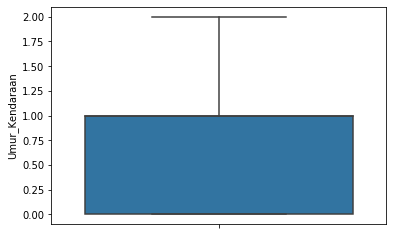

In [18]:
#mencari apakah ada outliers pada atribut Umur_Kendaraan

sns.boxplot(y='Umur_Kendaraan',data=data_model)

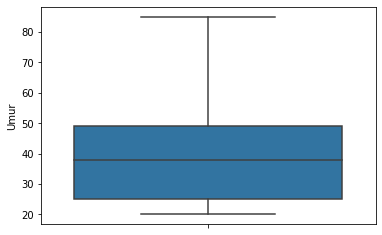

In [19]:
#mencari apakah ada outliers pada atribut Umur

sns.boxplot(y='Umur',data=data_model)

In [20]:
#fungsi MinMax Normalization
def normalize(x):
    return (x - x.min())/(x.max() - x.min())


scaled_df = data_model[['Umur','Umur_Kendaraan']].apply(normalize)
scaled_df


,Umur,Umur_Kendaraan
0,0.153846,0.0
1,0.430769,1.0
2,0.015385,0.0
3,0.584615,0.5
4,0.461538,1.0
...,...,...
285826,0.046154,0.0
285827,0.015385,0.0
285828,0.046154,0.0
285829,0.738462,0.5


In [21]:
#dataset baru yang sudah discale, di export menjadi file csv yang baru.

scaled_df.to_csv('data_model.csv',index=False)

#TAHAP EKSPLORASI DAN PERSIAPAN DATA SELESAI DISINI!!!